In [24]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
len(X_train)

60000

In [8]:
len(y_train)

60000

In [9]:
len(X_test)

10000

In [10]:
len(y_test)

10000

In [11]:
from tensorflow.keras import backend as K

if K.image_data_format() == 'channel_first':
    X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
    X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


In [12]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


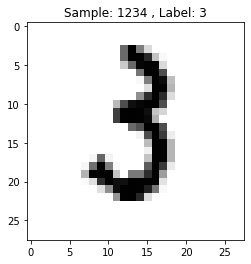

In [20]:
import matplotlib.pyplot as plt

def display_sample(num):
    #Print one hot array of this sample
    print(y_train[num])
    # Print the label converted back to a number
    label = y_train[num].argmax(axis=0)
    # Reshape the 768 values to a 28x28 images
    image = X_train[num].reshape([28, 28])
    plt.title('Sample: %d , Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

display_sample(1234)

In [25]:
# build convolutional neural network for character recognition
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
# Reducce by taking the max of each 2x2 block
model.add(MaxPool2D(pool_size=(2, 2)))
# # Dropout to avoid overfitting
model.add(Dropout(0.25))
# Flatten the results to one dimension for passing into our final layer
model.add(Flatten())
# A hidden layer to learn with
model.add(Dense(128, activation='relu'))
# Another dropout
model.add(Dropout(0.5))
# Final categorization from 0-9 with softmax
model.add(Dense(10, activation='softmax'))

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                      

In [27]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [29]:
history = model.fit(X_train, y_train,
                   epochs=20,
                   verbose=2,
                   validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 - 39s - loss: 0.0225 - accuracy: 0.9924 - val_loss: 0.0331 - val_accuracy: 0.9926 - 39s/epoch - 21ms/step
Epoch 2/20
1875/1875 - 40s - loss: 0.0222 - accuracy: 0.9923 - val_loss: 0.0327 - val_accuracy: 0.9925 - 40s/epoch - 21ms/step
Epoch 3/20
1875/1875 - 40s - loss: 0.0204 - accuracy: 0.9933 - val_loss: 0.0297 - val_accuracy: 0.9919 - 40s/epoch - 21ms/step
Epoch 4/20
1875/1875 - 40s - loss: 0.0196 - accuracy: 0.9941 - val_loss: 0.0327 - val_accuracy: 0.9920 - 40s/epoch - 21ms/step
Epoch 5/20
1875/1875 - 40s - loss: 0.0189 - accuracy: 0.9939 - val_loss: 0.0354 - val_accuracy: 0.9921 - 40s/epoch - 21ms/step
Epoch 6/20
1875/1875 - 40s - loss: 0.0175 - accuracy: 0.9944 - val_loss: 0.0315 - val_accuracy: 0.9920 - 40s/epoch - 21ms/step
Epoch 7/20
1875/1875 - 41s - loss: 0.0170 - accuracy: 0.9941 - val_loss: 0.0382 - val_accuracy: 0.9919 - 41s/epoch - 22ms/step
Epoch 8/20
1875/1875 - 41s - loss: 0.0162 - accuracy: 0.9947 - val_loss: 0.0352 - val_accuracy: 0.9920 - 41s/ep

KeyboardInterrupt: 

In [30]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test acc:', score[1])

Test loss: 0.03526439890265465
Test acc: 0.9934999942779541


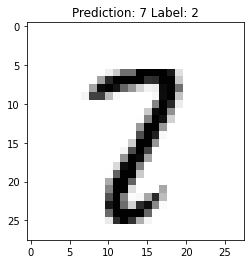

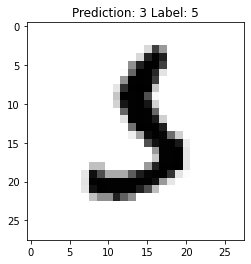

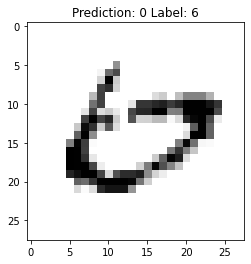

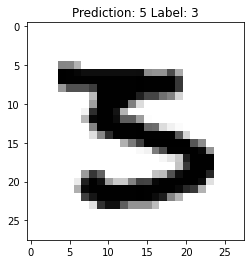

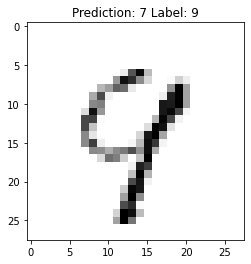

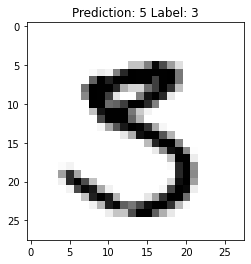

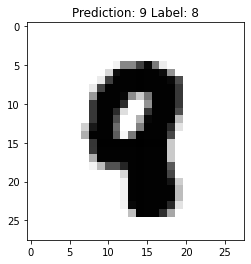

In [35]:
for x in range(1000):
    test_image = X_test[x,:].reshape(1, 28, 28, 1)
    test_image = test_image.astype('float32')
    predicted_cat =  model.predict(test_image).argmax()
    label = y_test[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28, 28]), cmap=plt.get_cmap('gray_r'))
        plt.show()